#  CE-40959: Deep Learning

## Homework 5 - 2:  EBGAN

The goal is to train a GAN with an auto-encoder as its discriminator.
For further information read the [paper of EBGAN](https://arxiv.org/abs/1609.03126).

Good luck

In [0]:
import numpy as np

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
CUDA = True
BATCH_SIZE = 64

In [0]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def show(image_batch, rows=1):
    # Set Plot dimensions
    cols = np.ceil(image_batch.shape[0] / rows)
    plt.rcParams['figure.figsize'] = (0.0 + cols, 0.0 + rows) # set default size of plots
    
    for i in range(image_batch.shape[0]):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_batch[i], cmap="gray", vmin=0, vmax=1)
        plt.axis('off')
    plt.show()

---

In [0]:
class AutoEncoderMSE(nn.Module):
    def __init__(self, input_dim, encoder_dims, decoder_dims, dropout_rate=0.5):
        super(AutoEncoderMSE, self).__init__()
        
        self.input_dim = input_dim
        ########################## TODO ##########################
        # self.input_dropout must be a dropout module with p=dropout_rate
        self.input_dropout = nn.Dropout(p=dropout_rate)
        ######################## END TODO ########################
        
        
        # Encoder part
        encoder_layers = []
        ########################## TODO ##########################
        # Define encoder layers and add them to `encoder_layers`
        # Use nn.LeakyReLU(0.2) for activation functions
        encoder_layers.append(nn.Linear(input_dim, encoder_dims[0]))
        encoder_layers.append(nn.LeakyReLU(0.2))
        for i in range(len(encoder_dims)-1):
          encoder_layers.append(nn.Linear(encoder_dims[i], encoder_dims[i+1]))
          encoder_layers.append(nn.LeakyReLU(0.2))
        ######################## END TODO ########################
        self.encoder = nn.Sequential(*encoder_layers)
        
        last_encoder_dim = ([input_dim] + encoder_dims)[-1]

        # Decoder part
        decoder_layers = []
        ########################## TODO ##########################
        # Define decoder layers and add them to `decoder_layers`
        # Use nn.LeakyReLU(0.2) for activation functions
        # Last layer does not need any activation function
        decoder_layers.append(nn.Linear(last_encoder_dim, decoder_dims[0]))
        decoder_layers.append(nn.LeakyReLU(0.2))
        for i in range(len(decoder_dims)-1):
          decoder_layers.append(nn.Linear(decoder_dims[i], decoder_dims[i+1]))
          decoder_layers.append(nn.LeakyReLU(0.2))
        decoder_layers.append(nn.Linear(decoder_dims[-1], self.input_dim))
        ######################## END TODO ########################
        self.decoder = nn.Sequential(*decoder_layers)
        
        self.MSE = nn.MSELoss(reduction='none')

    def forward(self, x):
        ########################## TODO ##########################
        # Complete the flow
        # x > dropout > encoder > h > decoder > output > mse
        # Note that mse.shape = (batch_size, )
        # DO NOT FORGET TO ADD DROPOUT LAYER
        
        x = self.input_dropout(x)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        mse = self.MSE(x, decoded).mean((1))
        return mse
        ######################## END TODO ########################

      
discriminator = AutoEncoderMSE(784, [256, 128, 64], [128, 256], dropout_rate=0.5)

In [0]:
generator = nn.Sequential(
    nn.Linear(128, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 256),
    nn.Dropout(),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 784),
    nn.Sigmoid()
)

In [0]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [0]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002

opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [0]:
N_EPOCH = 100

epoch: 0 	 last batch loss D: 16.502710342407227 	 last batch loss G: 0.31724533438682556


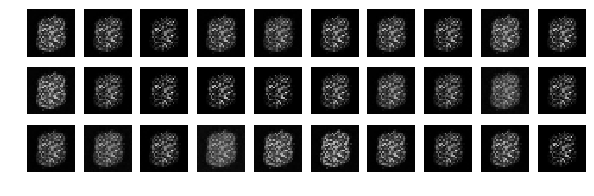

epoch: 1 	 last batch loss D: 16.035451889038086 	 last batch loss G: 0.13048513233661652


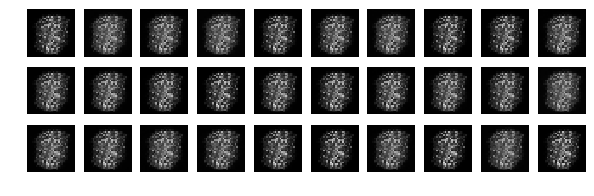

epoch: 2 	 last batch loss D: 16.355915069580078 	 last batch loss G: 0.05343712121248245


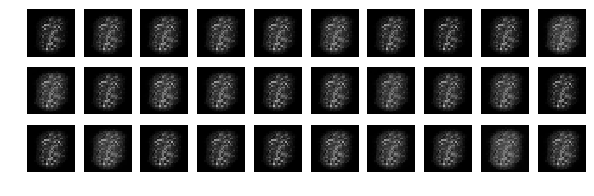

epoch: 3 	 last batch loss D: 16.089092254638672 	 last batch loss G: 0.2263658046722412


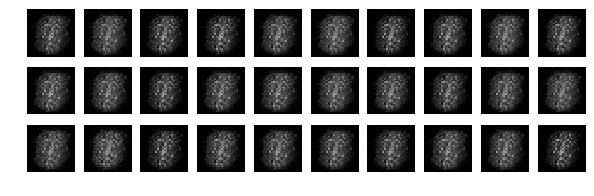

epoch: 4 	 last batch loss D: 10.875245094299316 	 last batch loss G: 15.130827903747559


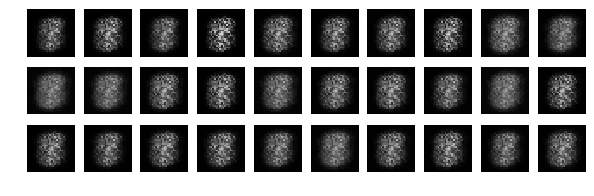

epoch: 5 	 last batch loss D: 7.41667366027832 	 last batch loss G: 31.489849090576172


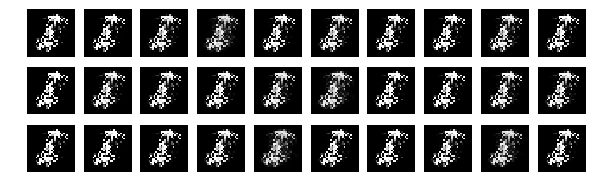

epoch: 6 	 last batch loss D: 2.481656551361084 	 last batch loss G: 34.999271392822266


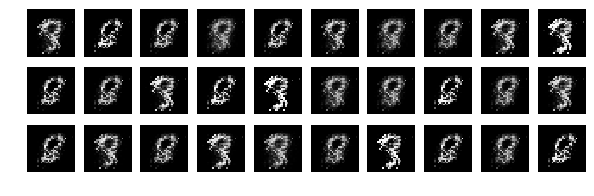

epoch: 7 	 last batch loss D: 1.7133409976959229 	 last batch loss G: 21.195785522460938


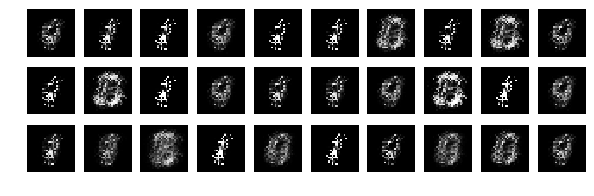

epoch: 8 	 last batch loss D: 2.179198980331421 	 last batch loss G: 24.512136459350586


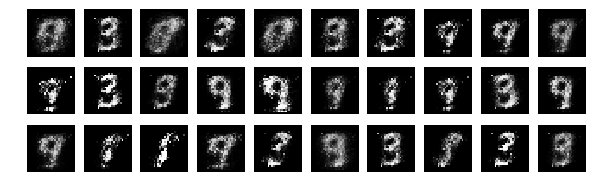

epoch: 9 	 last batch loss D: 2.8657026290893555 	 last batch loss G: 19.348270416259766


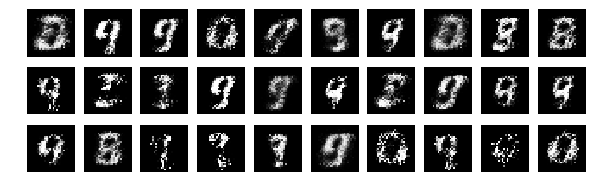

epoch: 10 	 last batch loss D: 2.756343364715576 	 last batch loss G: 21.62580108642578


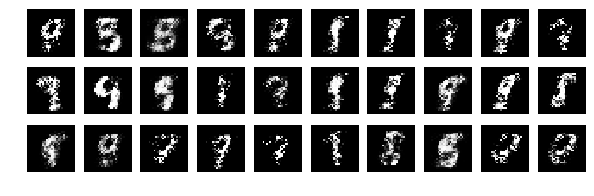

epoch: 11 	 last batch loss D: 3.8004021644592285 	 last batch loss G: 21.030458450317383


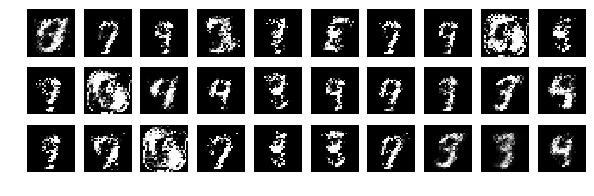

epoch: 12 	 last batch loss D: 2.039717674255371 	 last batch loss G: 22.992374420166016


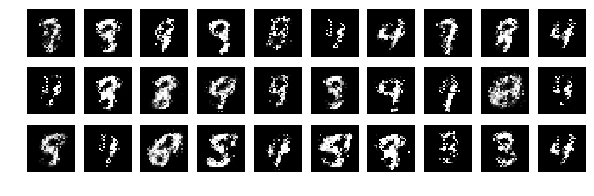

epoch: 13 	 last batch loss D: 1.7584786415100098 	 last batch loss G: 20.690059661865234


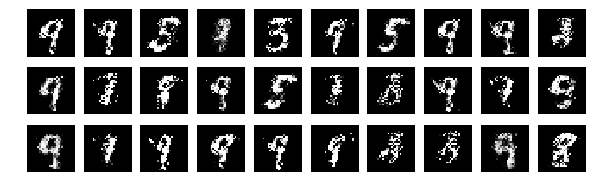

epoch: 14 	 last batch loss D: 4.518699645996094 	 last batch loss G: 19.919170379638672


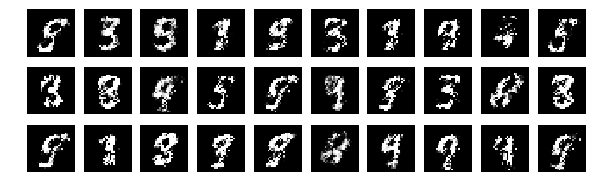

epoch: 15 	 last batch loss D: 2.2916126251220703 	 last batch loss G: 16.88445472717285


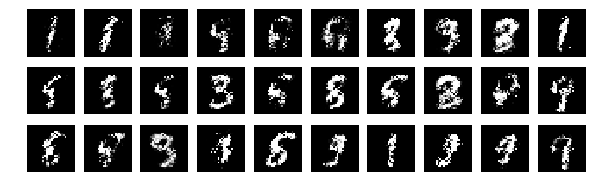

epoch: 16 	 last batch loss D: 2.2322182655334473 	 last batch loss G: 17.62335968017578


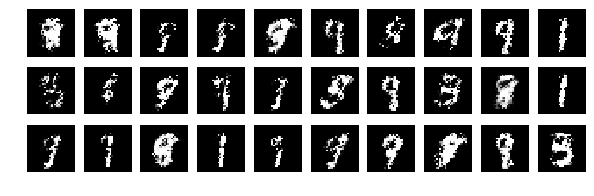

epoch: 17 	 last batch loss D: 4.802517414093018 	 last batch loss G: 17.890703201293945


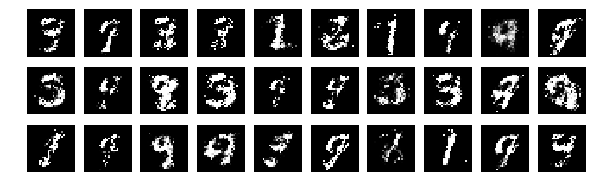

epoch: 18 	 last batch loss D: 2.5363521575927734 	 last batch loss G: 15.230020523071289


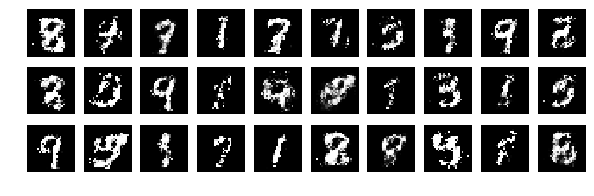

epoch: 19 	 last batch loss D: 4.725986957550049 	 last batch loss G: 16.586654663085938


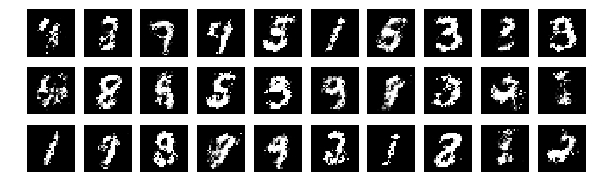

epoch: 20 	 last batch loss D: 6.382931709289551 	 last batch loss G: 15.45406723022461


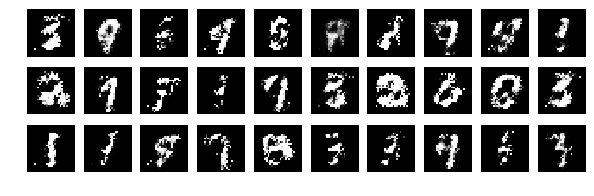

epoch: 21 	 last batch loss D: 4.74675178527832 	 last batch loss G: 14.566642761230469


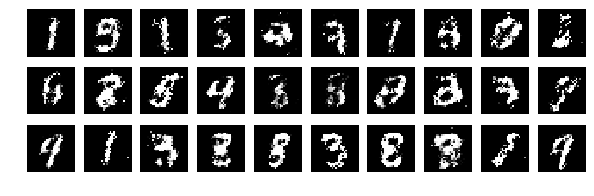

epoch: 22 	 last batch loss D: 5.574474334716797 	 last batch loss G: 13.701204299926758


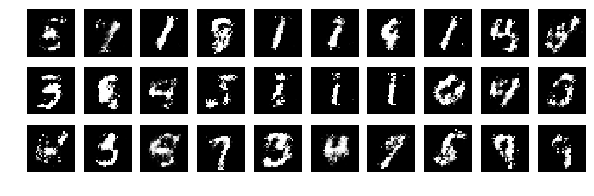

epoch: 23 	 last batch loss D: 4.760885238647461 	 last batch loss G: 15.719069480895996


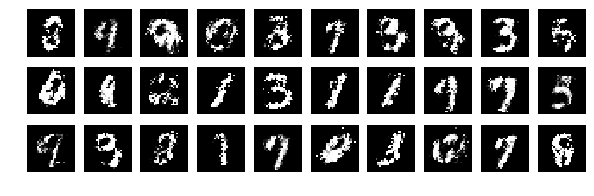

epoch: 24 	 last batch loss D: 5.434781074523926 	 last batch loss G: 14.08205795288086


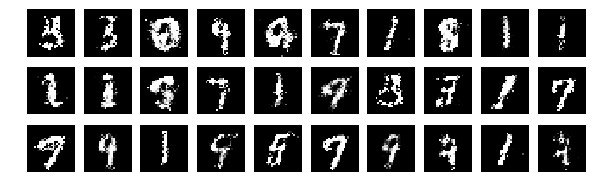

epoch: 25 	 last batch loss D: 5.646298408508301 	 last batch loss G: 14.251306533813477


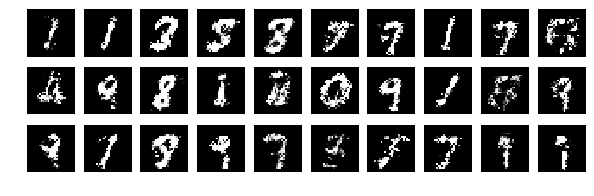

epoch: 26 	 last batch loss D: 5.172022342681885 	 last batch loss G: 13.930021286010742


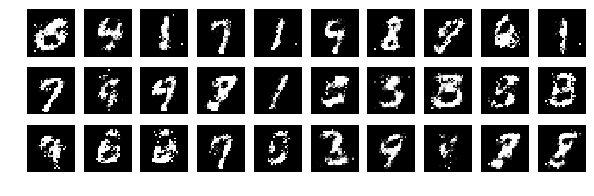

epoch: 27 	 last batch loss D: 5.7716474533081055 	 last batch loss G: 14.372514724731445


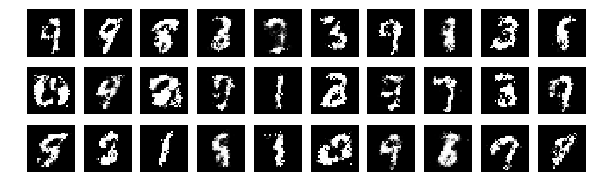

epoch: 28 	 last batch loss D: 5.471364974975586 	 last batch loss G: 14.36793041229248


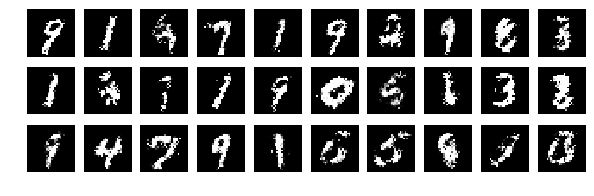

epoch: 29 	 last batch loss D: 7.301643371582031 	 last batch loss G: 12.565900802612305


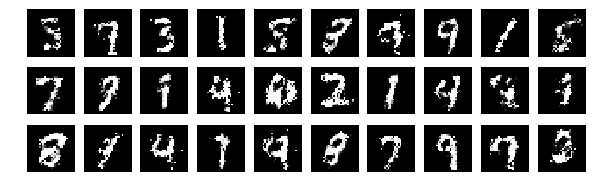

epoch: 30 	 last batch loss D: 7.648336410522461 	 last batch loss G: 13.297780990600586


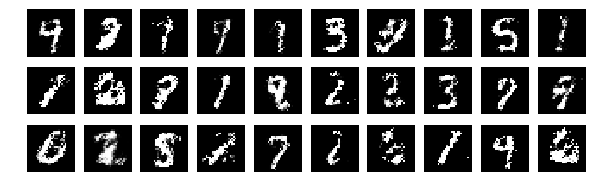

epoch: 31 	 last batch loss D: 6.885822296142578 	 last batch loss G: 12.401968002319336


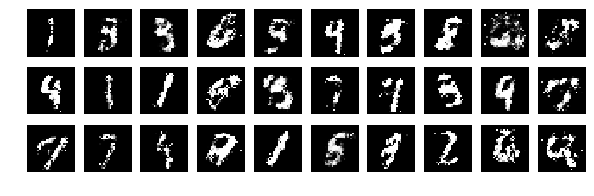

epoch: 32 	 last batch loss D: 7.35060977935791 	 last batch loss G: 15.213170051574707


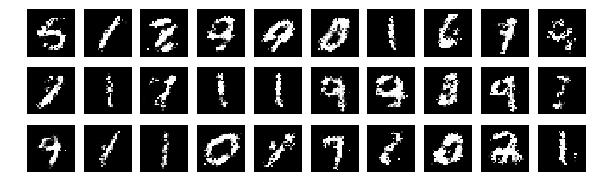

epoch: 33 	 last batch loss D: 5.082846641540527 	 last batch loss G: 15.037651062011719


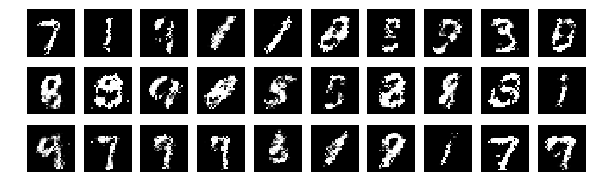

epoch: 34 	 last batch loss D: 7.796260833740234 	 last batch loss G: 9.832365036010742


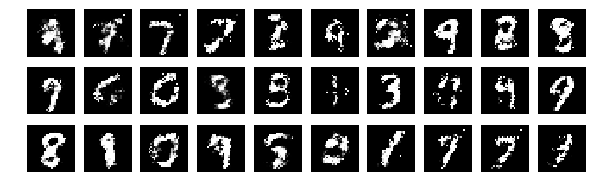

epoch: 35 	 last batch loss D: 8.715145111083984 	 last batch loss G: 14.887870788574219


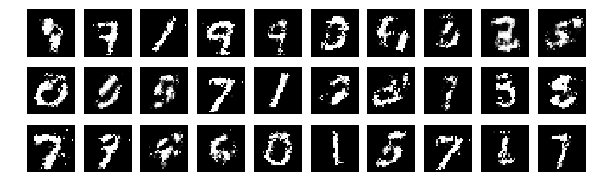

epoch: 36 	 last batch loss D: 10.743764877319336 	 last batch loss G: 13.938335418701172


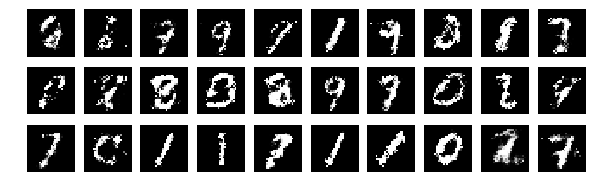

epoch: 37 	 last batch loss D: 8.078112602233887 	 last batch loss G: 12.759998321533203


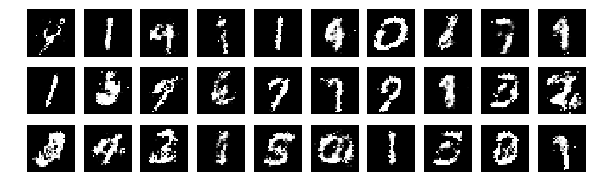

epoch: 38 	 last batch loss D: 4.684030532836914 	 last batch loss G: 14.173177719116211


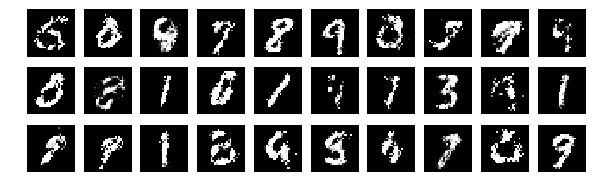

epoch: 39 	 last batch loss D: 9.041858673095703 	 last batch loss G: 11.510765075683594


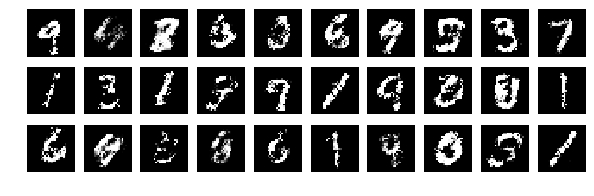

epoch: 40 	 last batch loss D: 7.539947509765625 	 last batch loss G: 13.103188514709473


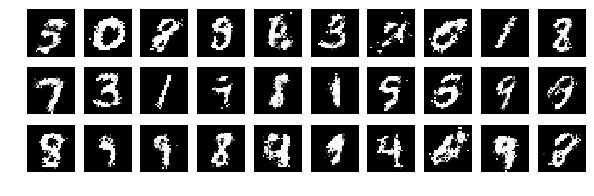

epoch: 41 	 last batch loss D: 9.422989845275879 	 last batch loss G: 14.648612976074219


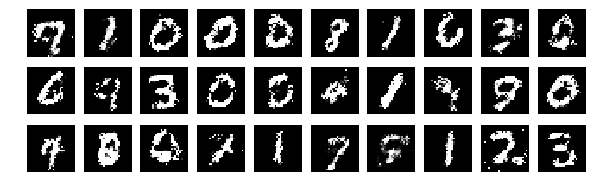

epoch: 42 	 last batch loss D: 7.2165045738220215 	 last batch loss G: 16.122329711914062


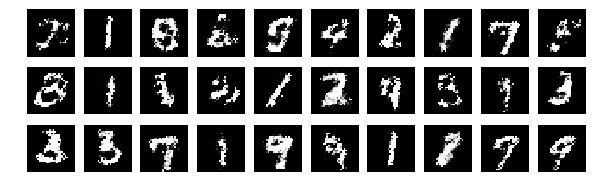

epoch: 43 	 last batch loss D: 6.374456405639648 	 last batch loss G: 14.383399963378906


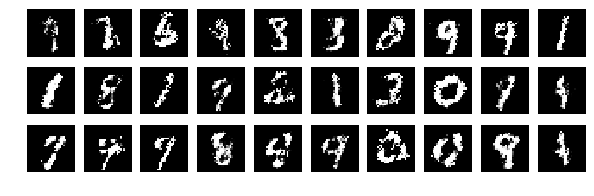

epoch: 44 	 last batch loss D: 9.270042419433594 	 last batch loss G: 14.058143615722656


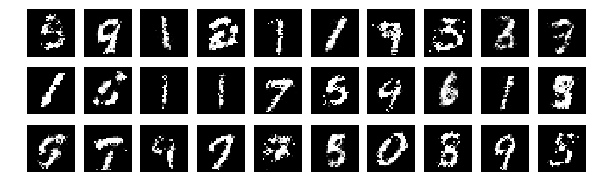

epoch: 45 	 last batch loss D: 4.0128068923950195 	 last batch loss G: 14.711711883544922


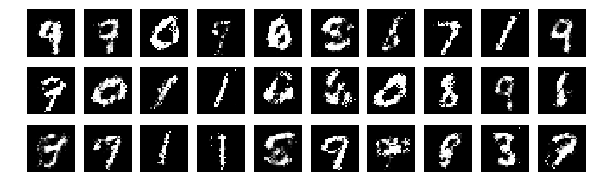

epoch: 46 	 last batch loss D: 11.586527824401855 	 last batch loss G: 12.21645736694336


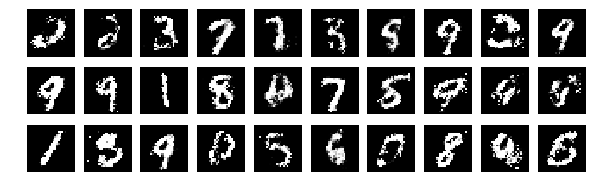

epoch: 47 	 last batch loss D: 6.876708984375 	 last batch loss G: 14.322769165039062


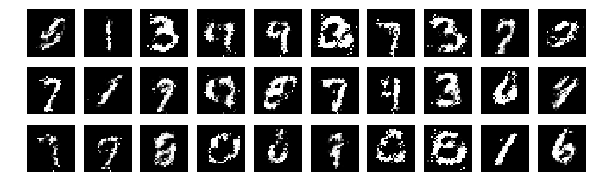

epoch: 48 	 last batch loss D: 7.083175182342529 	 last batch loss G: 13.260817527770996


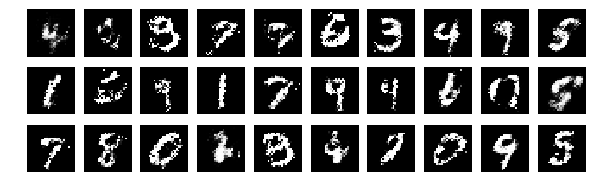

epoch: 49 	 last batch loss D: 5.35513973236084 	 last batch loss G: 13.942506790161133


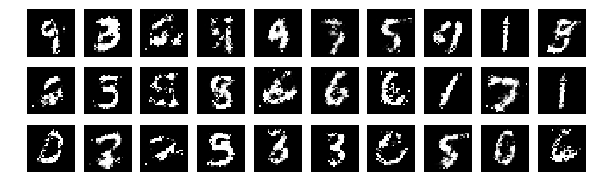

epoch: 50 	 last batch loss D: 5.668364524841309 	 last batch loss G: 12.445748329162598


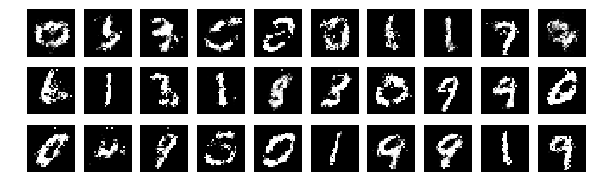

epoch: 51 	 last batch loss D: 9.36925220489502 	 last batch loss G: 13.226530075073242


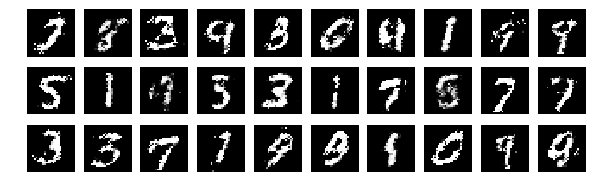

epoch: 52 	 last batch loss D: 9.535415649414062 	 last batch loss G: 11.72932243347168


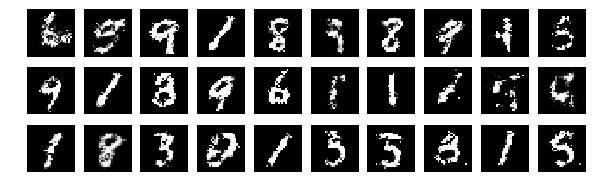

epoch: 53 	 last batch loss D: 9.806745529174805 	 last batch loss G: 12.404501914978027


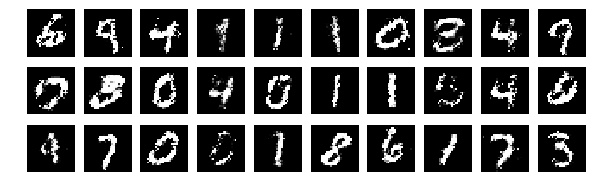

epoch: 54 	 last batch loss D: 5.78498649597168 	 last batch loss G: 13.257692337036133


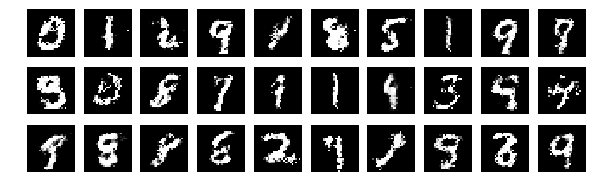

epoch: 55 	 last batch loss D: 6.418356418609619 	 last batch loss G: 13.189697265625


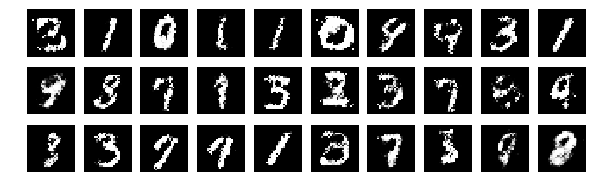

epoch: 56 	 last batch loss D: 8.402307510375977 	 last batch loss G: 13.315238952636719


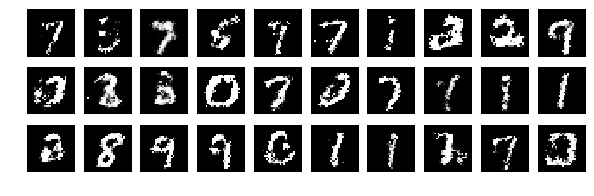

epoch: 57 	 last batch loss D: 6.346353530883789 	 last batch loss G: 12.909046173095703


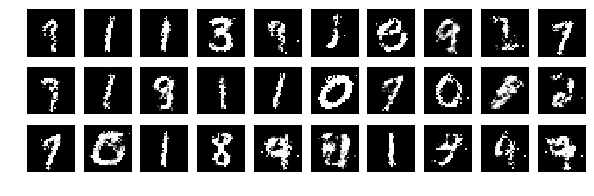

epoch: 58 	 last batch loss D: 7.646521091461182 	 last batch loss G: 12.606851577758789


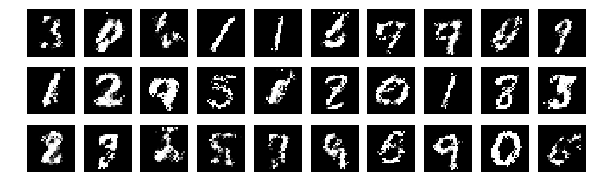

epoch: 59 	 last batch loss D: 10.097149848937988 	 last batch loss G: 14.096151351928711


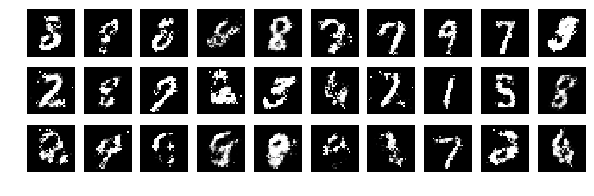

epoch: 60 	 last batch loss D: 6.541198253631592 	 last batch loss G: 14.085770606994629


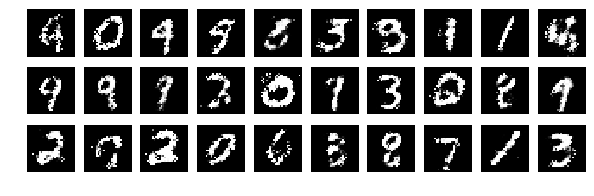

epoch: 61 	 last batch loss D: 8.41436767578125 	 last batch loss G: 13.142681121826172


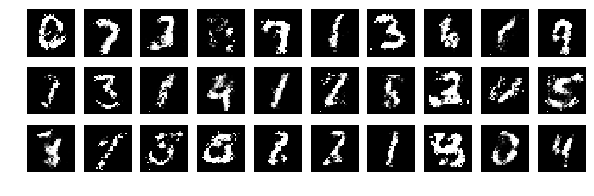

epoch: 62 	 last batch loss D: 6.43711519241333 	 last batch loss G: 13.686878204345703


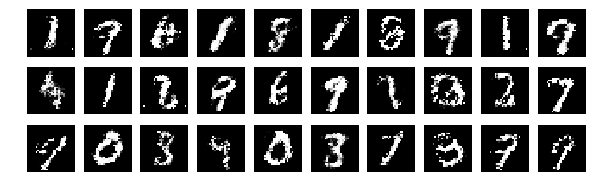

epoch: 63 	 last batch loss D: 5.187775611877441 	 last batch loss G: 12.032974243164062


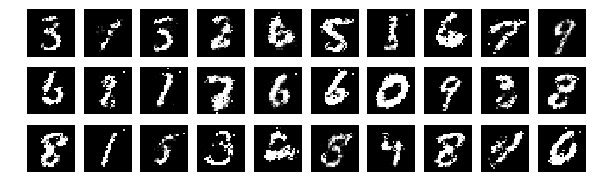

epoch: 64 	 last batch loss D: 10.462393760681152 	 last batch loss G: 11.53286361694336


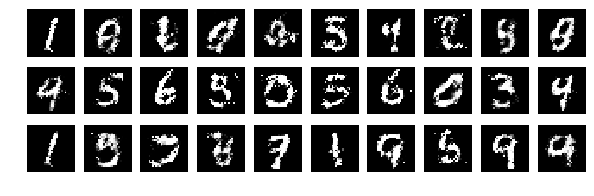

epoch: 65 	 last batch loss D: 8.260047912597656 	 last batch loss G: 11.996463775634766


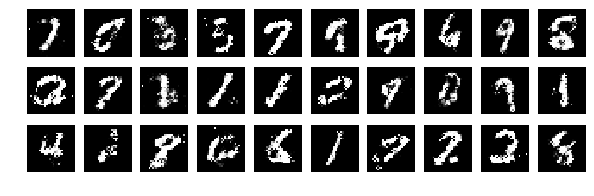

epoch: 66 	 last batch loss D: 6.943343162536621 	 last batch loss G: 11.515328407287598


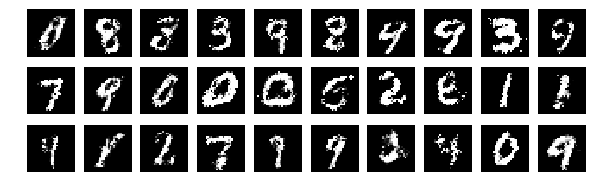

epoch: 67 	 last batch loss D: 11.853235244750977 	 last batch loss G: 12.726789474487305


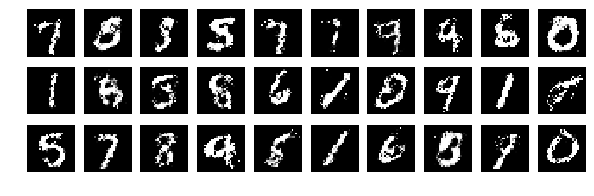

epoch: 68 	 last batch loss D: 13.608048439025879 	 last batch loss G: 12.322235107421875


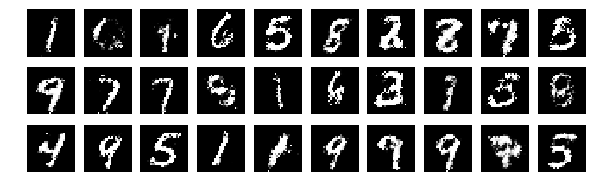

epoch: 69 	 last batch loss D: 8.968732833862305 	 last batch loss G: 10.563898086547852


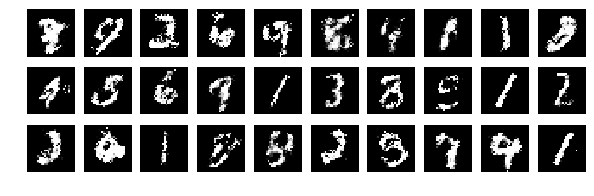

epoch: 70 	 last batch loss D: 11.494256019592285 	 last batch loss G: 14.094056129455566


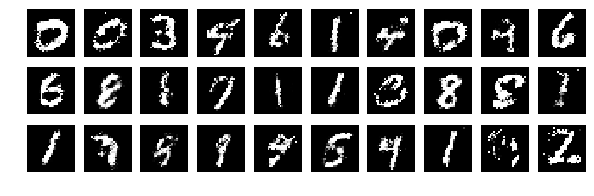

epoch: 71 	 last batch loss D: 9.663124084472656 	 last batch loss G: 13.397541046142578


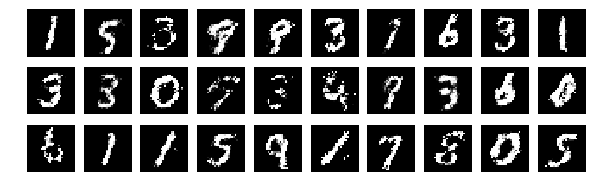

epoch: 72 	 last batch loss D: 8.016641616821289 	 last batch loss G: 12.354448318481445


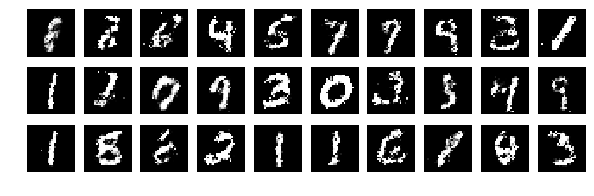

epoch: 73 	 last batch loss D: 5.660243988037109 	 last batch loss G: 13.212867736816406


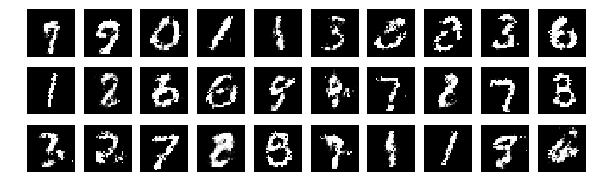

epoch: 74 	 last batch loss D: 7.309521198272705 	 last batch loss G: 12.55586051940918


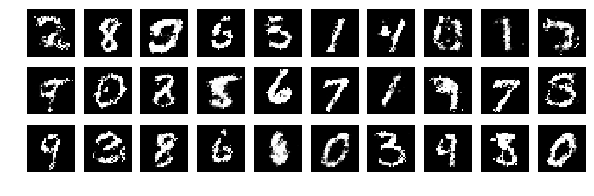

epoch: 75 	 last batch loss D: 11.434643745422363 	 last batch loss G: 10.462884902954102


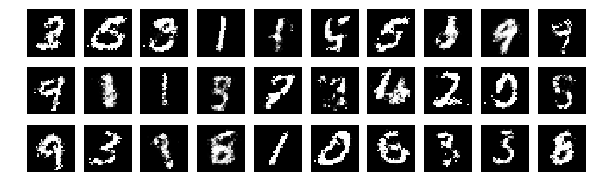

epoch: 76 	 last batch loss D: 9.711889266967773 	 last batch loss G: 12.062786102294922


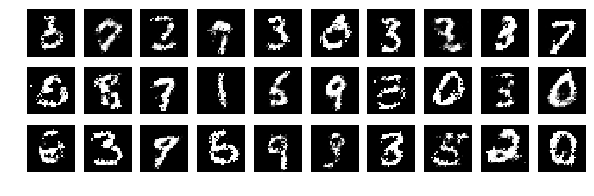

epoch: 77 	 last batch loss D: 8.099334716796875 	 last batch loss G: 10.628608703613281


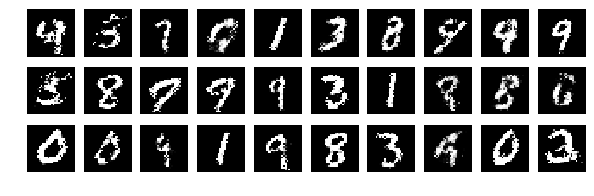

epoch: 78 	 last batch loss D: 9.206220626831055 	 last batch loss G: 10.624014854431152


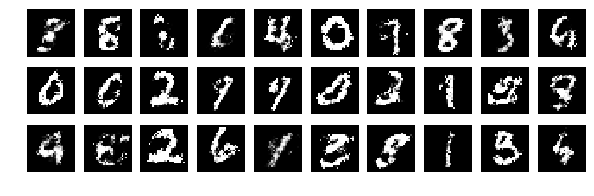

epoch: 79 	 last batch loss D: 6.772875785827637 	 last batch loss G: 13.910018920898438


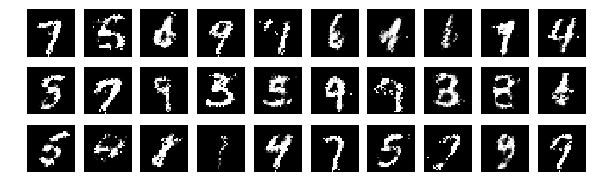

epoch: 80 	 last batch loss D: 8.322916030883789 	 last batch loss G: 9.864080429077148


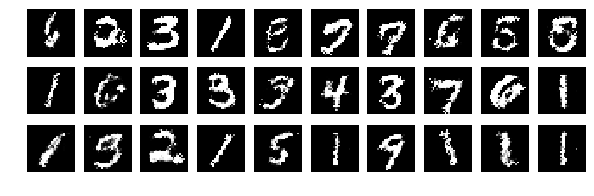

epoch: 81 	 last batch loss D: 8.69343376159668 	 last batch loss G: 12.166023254394531


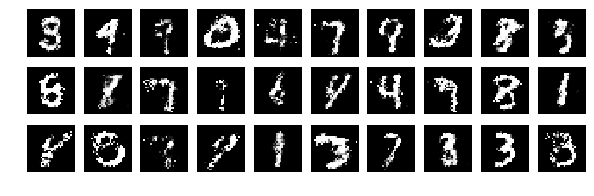

epoch: 82 	 last batch loss D: 9.664111137390137 	 last batch loss G: 14.460599899291992


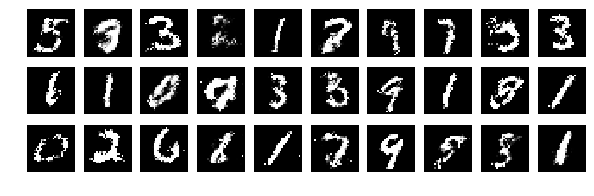

epoch: 83 	 last batch loss D: 9.305753707885742 	 last batch loss G: 13.390230178833008


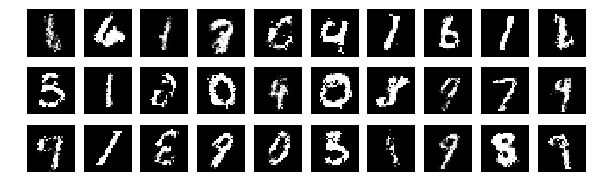

epoch: 84 	 last batch loss D: 7.338955402374268 	 last batch loss G: 14.018742561340332


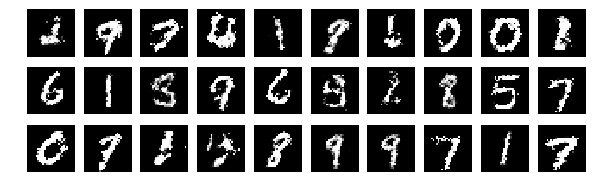

epoch: 85 	 last batch loss D: 11.517562866210938 	 last batch loss G: 12.625995635986328


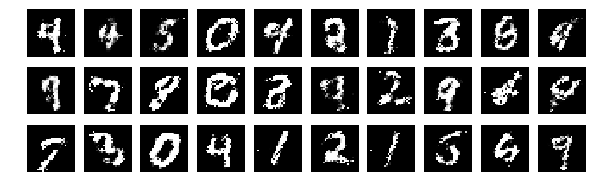

epoch: 86 	 last batch loss D: 10.952982902526855 	 last batch loss G: 13.047561645507812


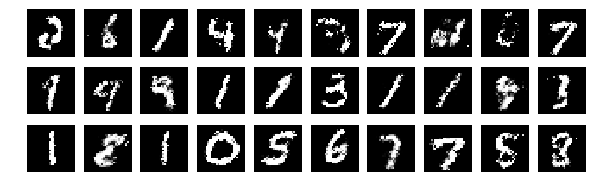

epoch: 87 	 last batch loss D: 10.512060165405273 	 last batch loss G: 11.04876708984375


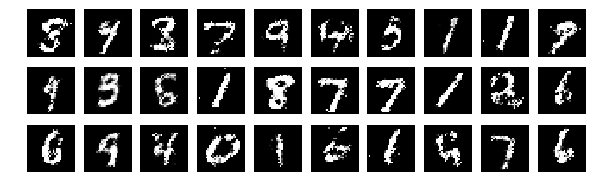

epoch: 88 	 last batch loss D: 7.805275917053223 	 last batch loss G: 10.256959915161133


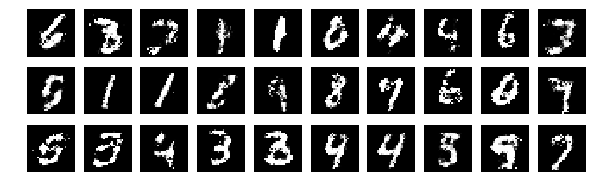

epoch: 89 	 last batch loss D: 9.778606414794922 	 last batch loss G: 12.368603706359863


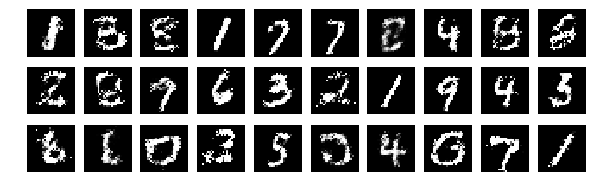

epoch: 90 	 last batch loss D: 8.606593132019043 	 last batch loss G: 12.227170944213867


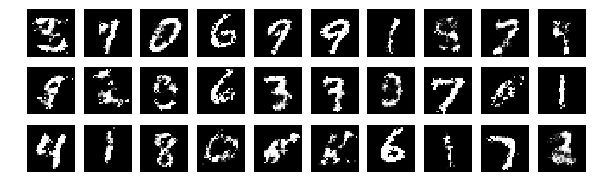

epoch: 91 	 last batch loss D: 10.112848281860352 	 last batch loss G: 10.61561393737793


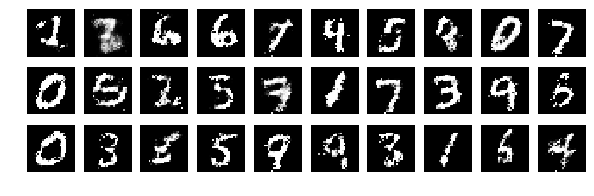

epoch: 92 	 last batch loss D: 9.003604888916016 	 last batch loss G: 10.953939437866211


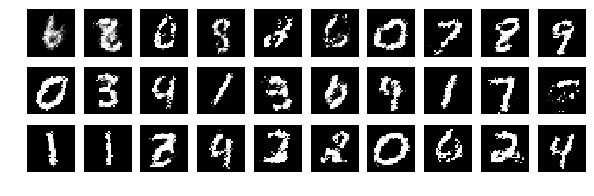

epoch: 93 	 last batch loss D: 7.32566499710083 	 last batch loss G: 11.953364372253418


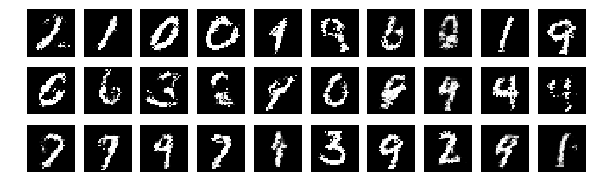

epoch: 94 	 last batch loss D: 7.033796787261963 	 last batch loss G: 14.157546997070312


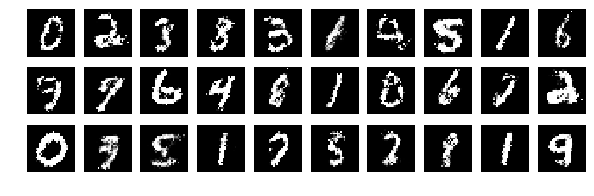

epoch: 95 	 last batch loss D: 8.85456657409668 	 last batch loss G: 11.788647651672363


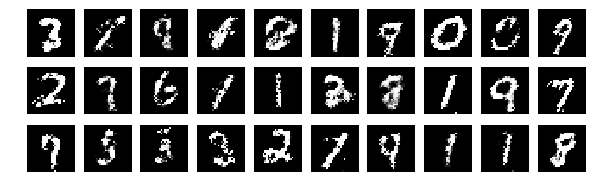

epoch: 96 	 last batch loss D: 10.762752532958984 	 last batch loss G: 12.803532600402832


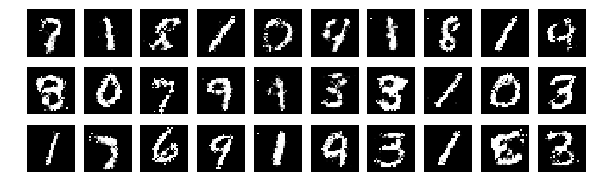

epoch: 97 	 last batch loss D: 6.6027069091796875 	 last batch loss G: 12.059683799743652


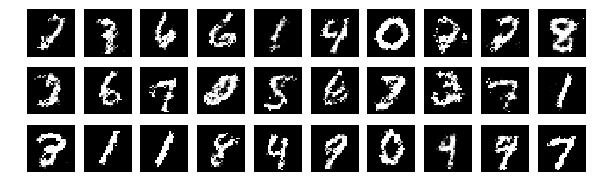

epoch: 98 	 last batch loss D: 8.15666389465332 	 last batch loss G: 12.298606872558594


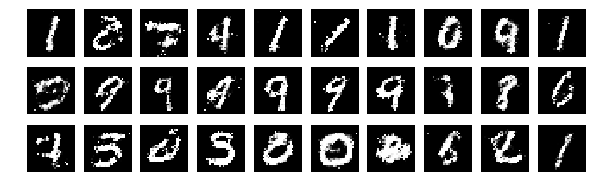

epoch: 99 	 last batch loss D: 4.757098197937012 	 last batch loss G: 11.976855278015137


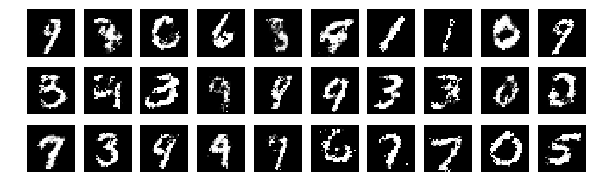

In [13]:
m = 16


for epoch in range(N_EPOCH):
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        z = torch.randn(img.shape[0], 128)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        # Discriminator Part
        opt_D.zero_grad()
        ########################## TODO ##########################
        # Define loss for discriminator
        dx = discriminator(real_img)
        dgz = discriminator(fake_img.detach())
#         repeatedM = m * torch.ones(dgz.shape[0]).cuda()
        loss_d = (dx + F.relu(m - dgz)).mean()
        ######################## END TODO ########################
        loss_d.backward()
        opt_D.step()
        
        # Generator Part
        opt_G.zero_grad()
        ########################## TODO ##########################
        # Define loss for generator
        loss_g = torch.mean(discriminator(fake_img))
        ######################## END TODO ########################
        loss_g.backward()
        opt_G.step()
        

    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))
    imgs_to_show = fake_img[:30].view(-1, 28, 28).detach().cpu().numpy()
    show(imgs_to_show, rows=3)
